In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table 
import textwrap

# Import dendrogram, linkage to create dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

from tradingview_screener.query import Query, And, Or
from tradingview_screener.column import col

In [2]:
df=pd.read_excel("data_final.xlsx",parse_dates=True,index_col=0)
z1=list(df.columns)

In [3]:
list= z1
fields=['ticker','name','fiscal_period_fy_h','ebitda_fy_h','total_debt_fy_h','gross_profit_fy_h','total_assets_fy_h','earnings_per_share_basic_fy_h','earnings_per_share_diluted_fy_h','free_cash_flow_fy_h','total_revenue_fy_h','net_income_fy_h']

df3=pd.DataFrame(columns=fields)

for i in range(len(list)):
  df4=(Query()
     .select('name','fiscal_period_fy_h','ebitda_fy_h','total_debt_fy_h','gross_profit_fy_h','total_assets_fy_h','earnings_per_share_basic_fy_h','earnings_per_share_diluted_fy_h','free_cash_flow_fy_h','total_revenue_fy_h','net_income_fy_h')
     .where(col('name')==list[i])
     .get_scanner_data())[1].to_dict()
  x=[key for key in df4.keys()]
  d={}
  for j in range(len(x)):
      d[fields[j]]=df4[x[j]][0]
  df3.loc[i]=d
df3.dropna(axis=0,inplace=True)
df3.set_index('name',inplace=True)
p=df3['fiscal_period_fy_h'][0]

C:\Users\user\AppData\Local\Temp\ipykernel_17052\3299439662.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=df3['fiscal_period_fy_h'][0]


In [4]:
final=df3.index
final

Index(['AAPL', 'AMGN', 'CVS', 'KLAC', 'LRCX', 'MCO', 'MDT', 'MSFT', 'NEE',
       'NVDA', 'PSX', 'SWKS', 'TGT'],
      dtype='object', name='name')

In [5]:
f=['ebitda_fy_h','total_debt_fy_h','gross_profit_fy_h','total_assets_fy_h','earnings_per_share_basic_fy_h','earnings_per_share_diluted_fy_h','free_cash_flow_fy_h','total_revenue_fy_h','net_income_fy_h']
e1={}
for y in range(len(p[:15])):
    e2={}
    for t in final:
        e3={}
        for t1 in range(len(f)): 
            e3[f[t1]]=df3[f[t1]].loc[t][y]
        e2[t]=e3
    e1[p[y]]=e2

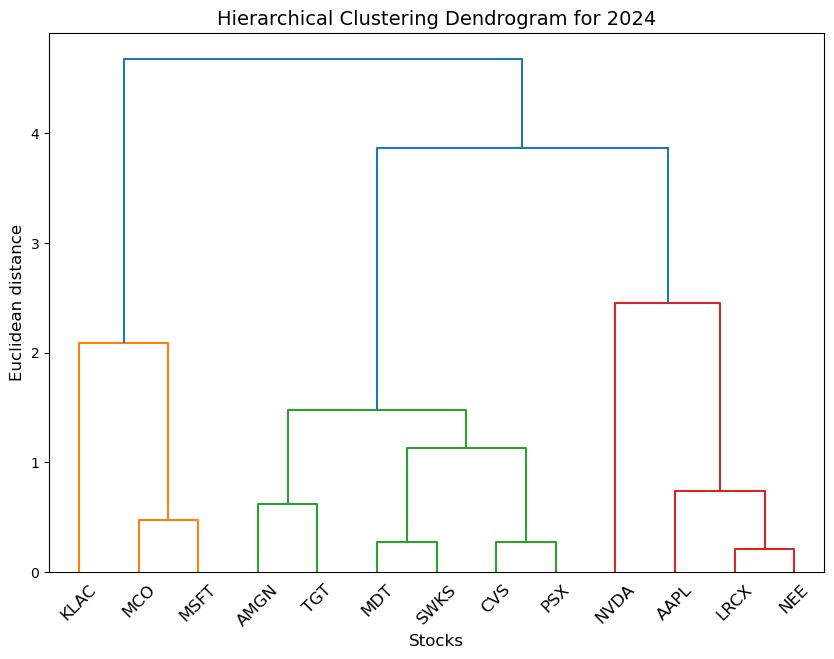

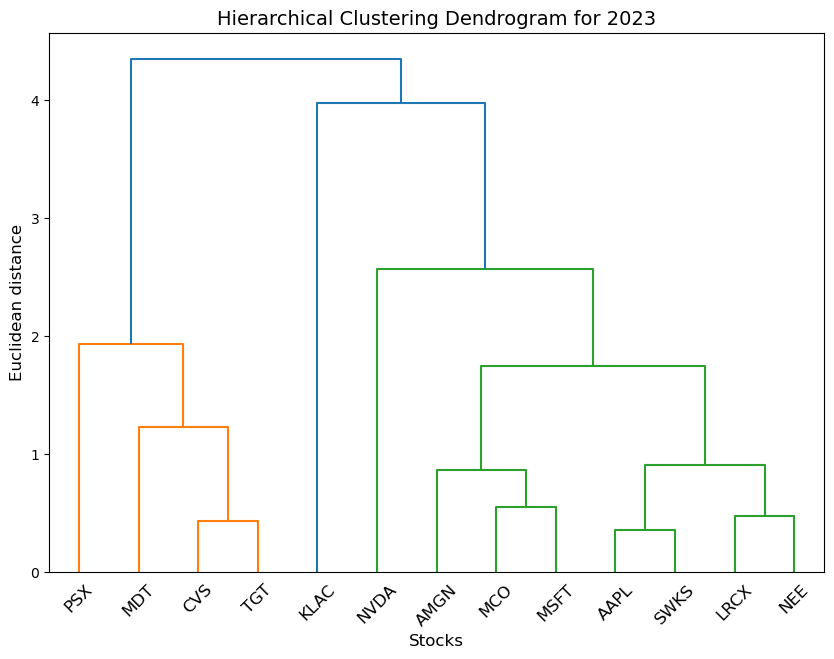

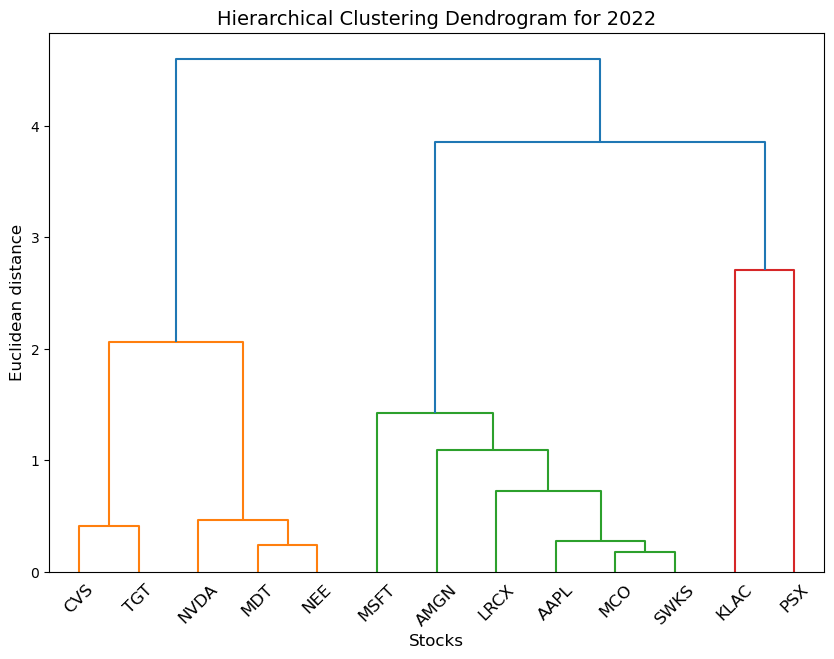

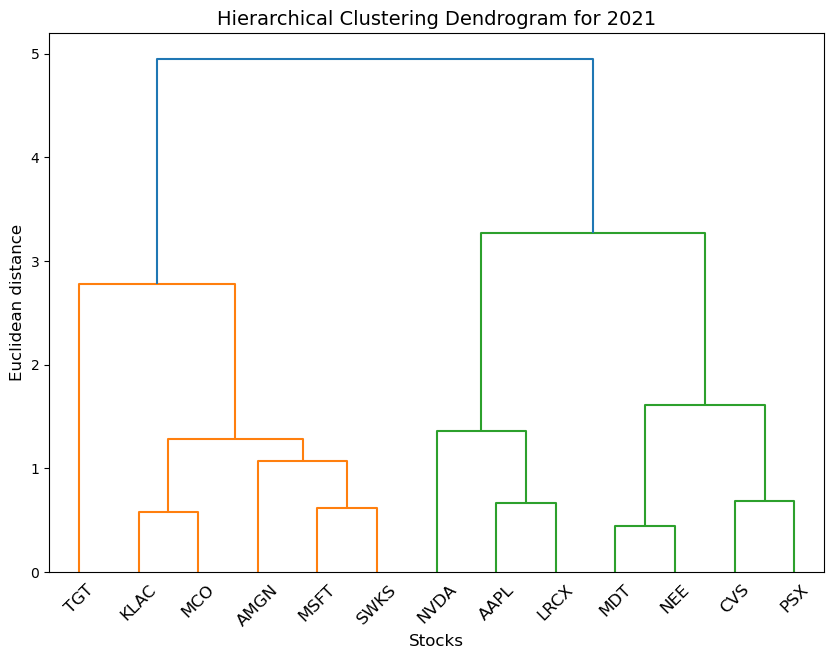

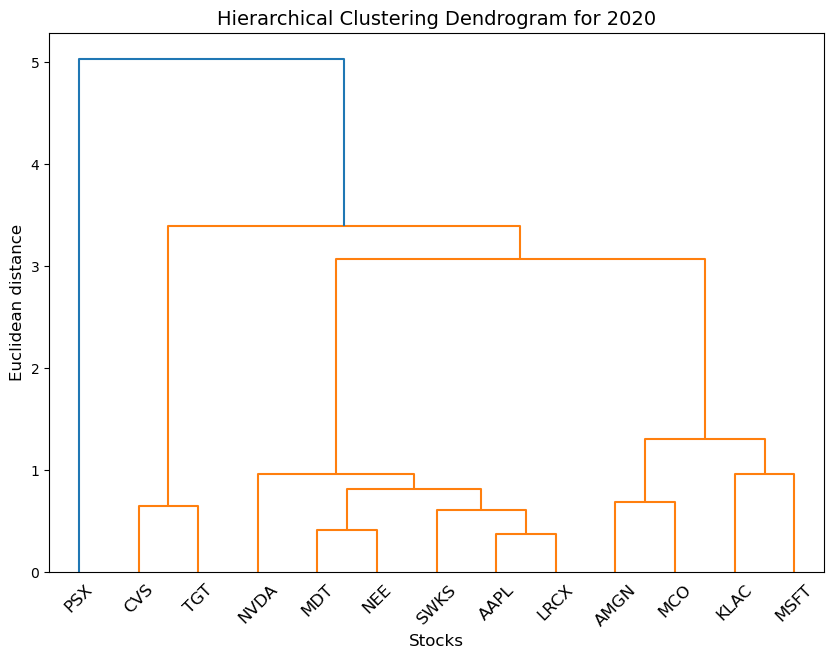

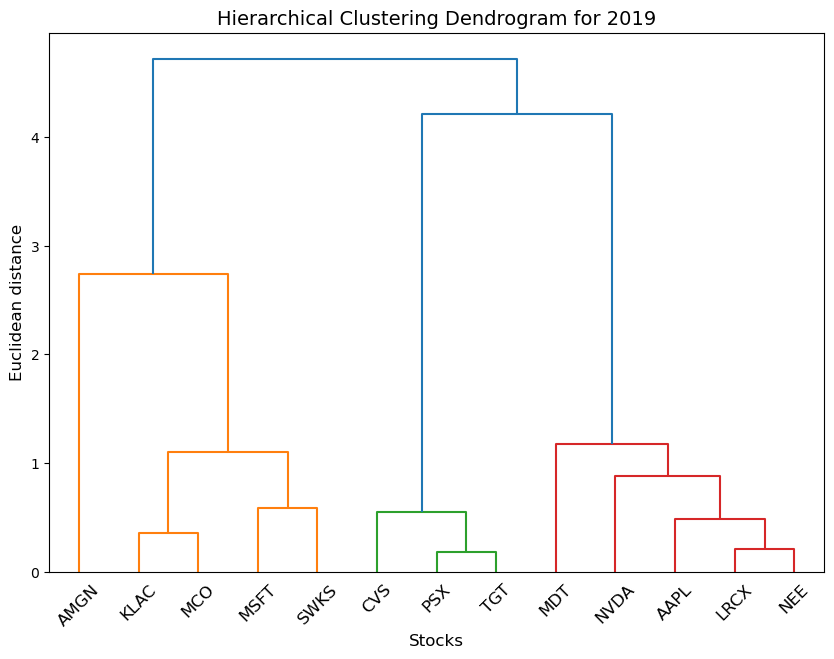

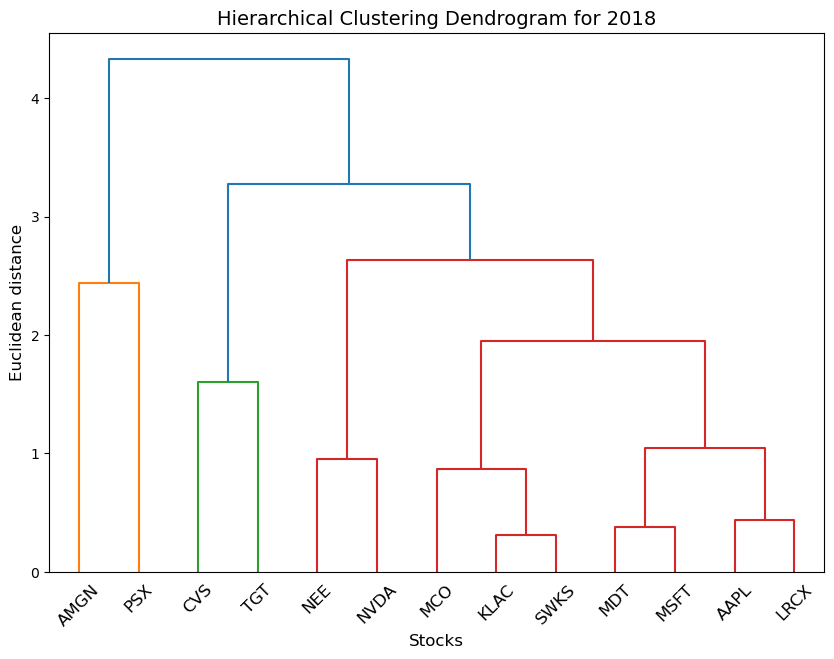

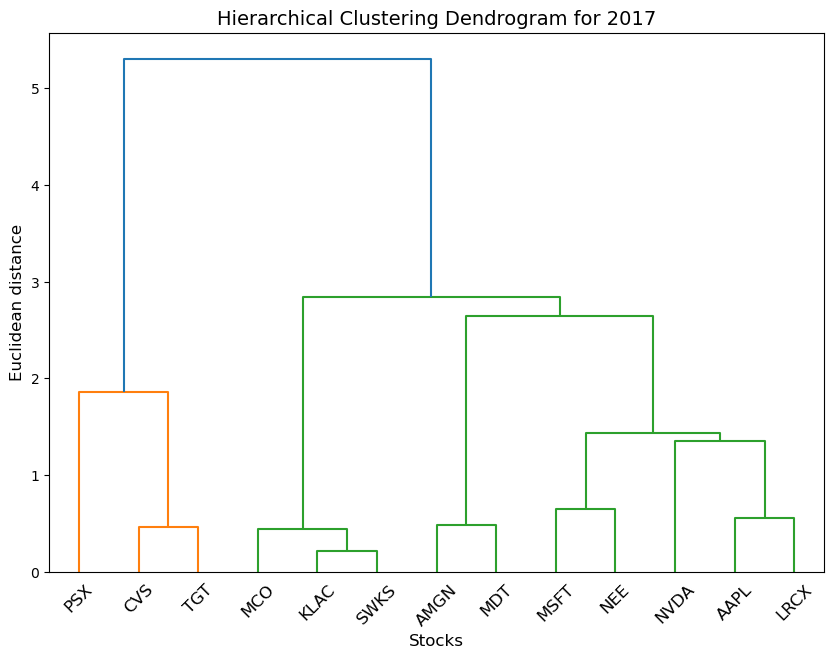

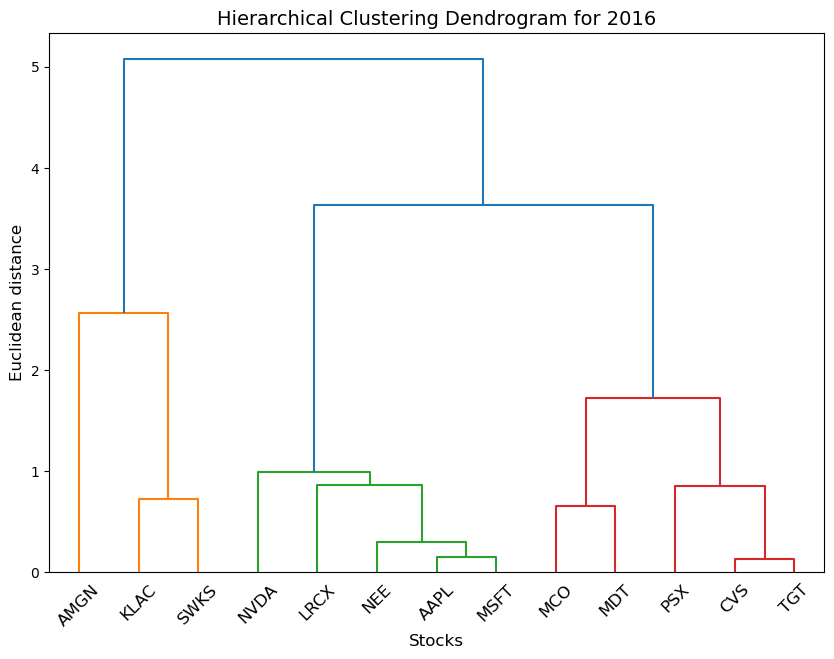

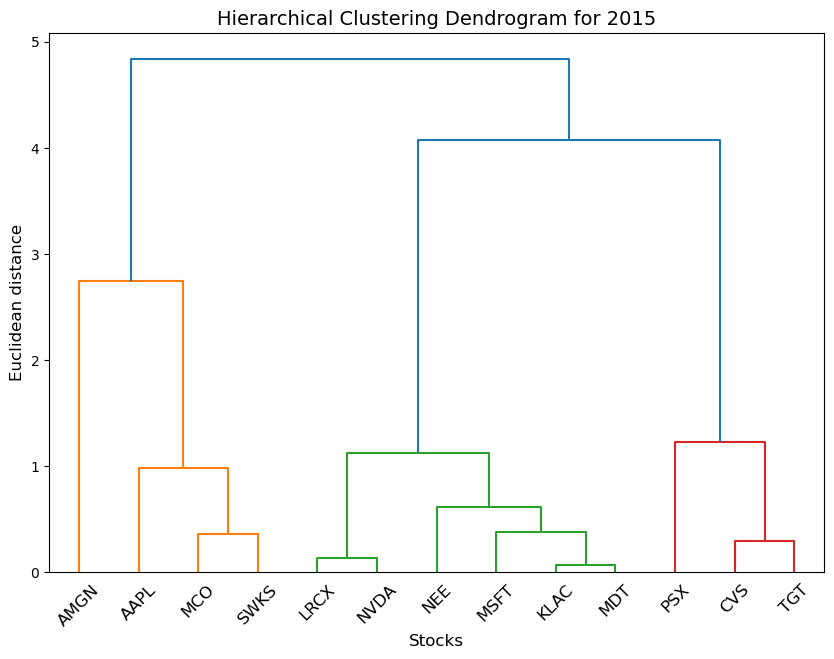

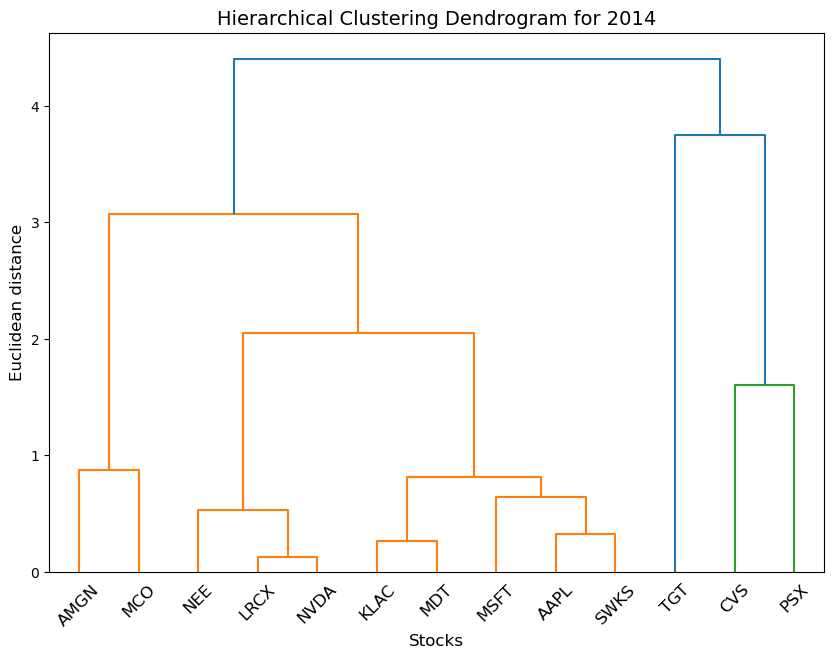

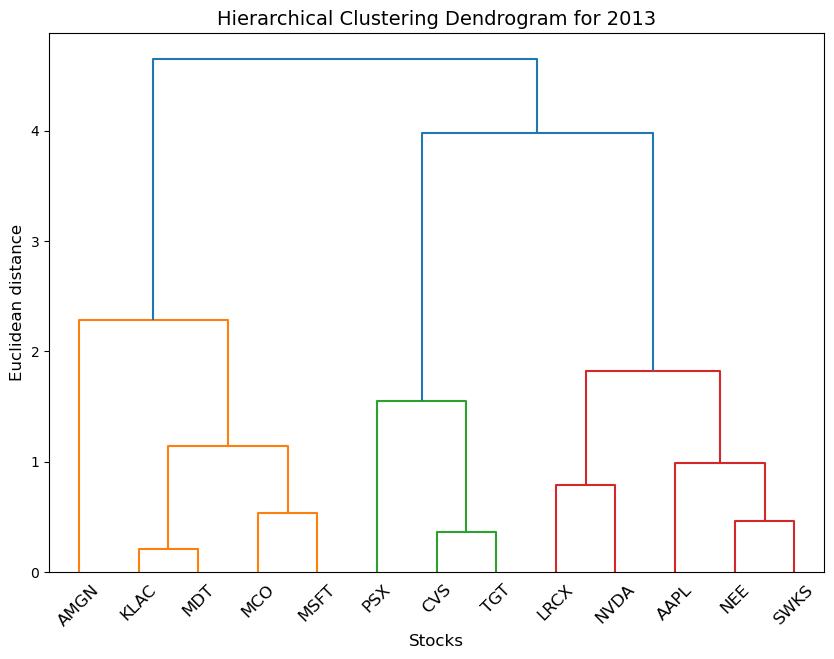

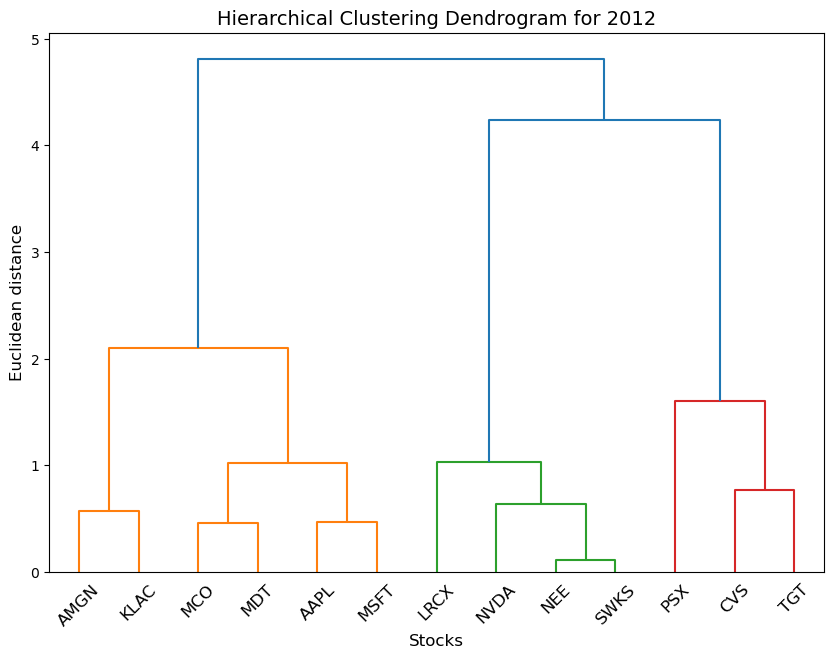

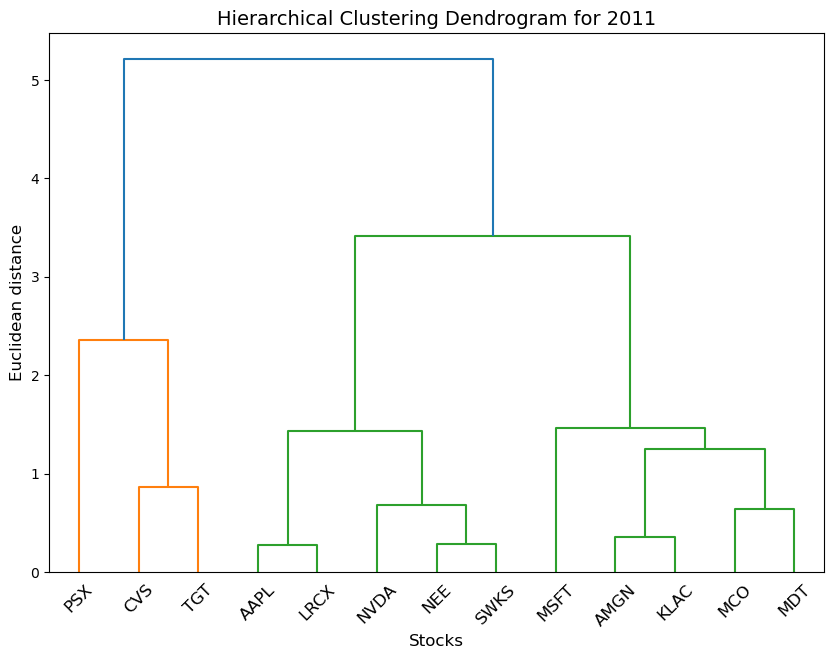

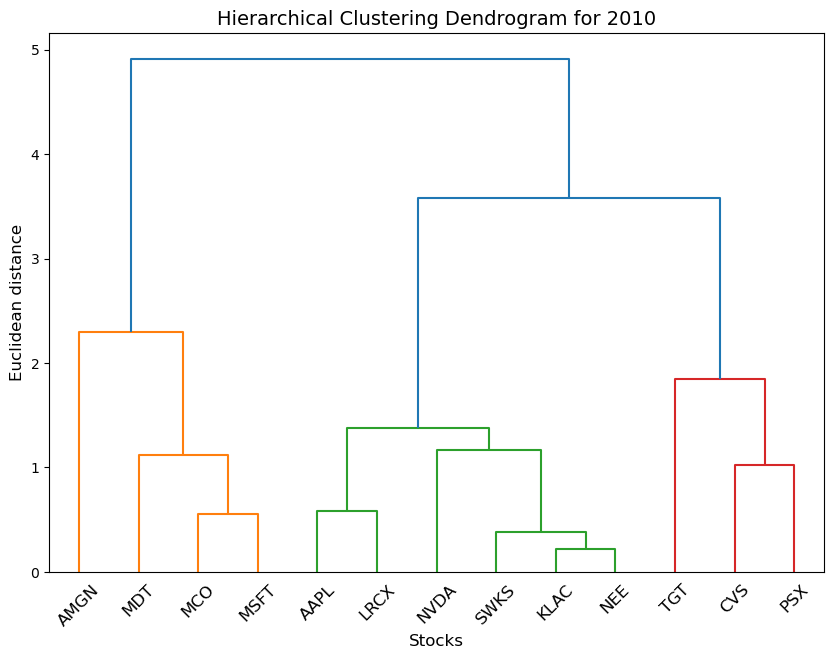

In [6]:
for h in p[:15]:
    x1=pd.DataFrame(e1[h]).T
    x1['ebitda_margin']=x1['ebitda_fy_h']/x1['total_revenue_fy_h']
    x1['debt_ratio']=x1['total_debt_fy_h']/x1['total_assets_fy_h']
    x1['gross_profit_margin']=x1['gross_profit_fy_h']/x1['total_revenue_fy_h']
    x1['net_pofit_margin']=x1['net_income_fy_h']/x1['total_revenue_fy_h']
    x1['return_on_asset_margin']=x1['net_income_fy_h']/x1['total_assets_fy_h']
    x2=x1[['earnings_per_share_diluted_fy_h','net_pofit_margin']]  #'ebitda_margin','debt_ratio','net_pofit_margin','return_on_asset_margin'
    train_dataset_scaled = pd.DataFrame(StandardScaler().fit_transform(x2),
                                    columns=[x2.columns],
                                    index=x2.index)
    plt.figure(figsize=(10, 7))
    plt.title('Hierarchical Clustering Dendrogram for '+str(h), fontsize=14)
    linkage_matrix = linkage(train_dataset_scaled, method='ward')
    dendrogram(linkage_matrix, labels=train_dataset_scaled.index)
    plt.xlabel("Stocks", fontsize=12)
    plt.ylabel('Euclidean distance', fontsize=12)
    #plt.title("For "+str(h))
    plt.xticks(rotation=45)
    name="Sharpe Ratio Clustering-Dendogram_plot"+str(h)+".pdf"
    plt.savefig(name,dpi=300)
    plt.show()

In [7]:
y1x=1
y2x=str(y1x)+"Y"
dates = pd.date_range(df.index[0], df.index[-1], freq=y2x)

C:\Users\user\AppData\Local\Temp\ipykernel_17052\3623737758.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(df.index[0], df.index[-1], freq=y2x)


In [8]:
def hrp_weights(tickers, dataset, returns_data,weights_hrp_initital):

    if len(tickers) > 1:
        
        input_df = dataset.loc[tickers]

        # Hierarchical Clustering using Agglomerative Clustering

        # Step 1: Define an agglomerative clustering model
        model = AgglomerativeClustering(
            n_clusters=2, linkage='ward')
        
        # Step 2: Call fit_predict_method on dataset
        clusters = model.fit_predict(input_df)

        # Step 3: Get tickers of cluster_0 and cluster_1
        cluster_0 = input_df.loc[clusters == 0, :].index
        
        cluster_1 = input_df.loc[clusters == 1, :].index
        
        # Step-4: Calculate the volatility of cluster_0 and cluster_1 
        cluster_0_returns  = calculate_cluster_returns(returns_data[cluster_0], cluster_0)
        
        cluster_1_returns  = calculate_cluster_returns(returns_data[cluster_1], cluster_1)

        # Step-5: Calculate the weights of cluster_0 and cluster_1
        weight_cluster_0 = (cluster_0_returns)/((cluster_0_returns)+(cluster_1_returns))#(1/cluster_0_volatility)/((1/cluster_0_volatility)+(1/cluster_1_volatility))
        
        weight_cluster_1 = (cluster_1_returns)/((cluster_1_returns)+(cluster_0_returns))#(1/cluster_1_volatility)/((1/cluster_0_volatility)+(1/cluster_1_volatility))

        # Multiply the weights of tickers in 'weights_hrp_initial' dataframe with respective weights of cluster_0 and cluster_1
        weights_hrp_initital.loc[cluster_0, 'HRP'] *= weight_cluster_0
        
        weights_hrp_initital.loc[cluster_1, 'HRP'] *= weight_cluster_1

        # Run the clustering algorithm on the new clusters i.e. cluster_0 and cluster_1
        hrp_weights(cluster_0, dataset, returns_data, weights_hrp_initital)
        
        hrp_weights(cluster_1, dataset, returns_data, weights_hrp_initital)
        
        # Create weights_hrp dataframe
        weights_hrp = weights_hrp_initital

        # output weights_hrp
        return weights_hrp

In [9]:
# Function to calculate cluster volatility
def calculate_cluster_returns(returns_data, tickers):

    # Calculating the standard deviation of stocks returns in the tickers list
    ret_mean = returns_data[tickers].mean()

    # Calculate the weights of stocks using inverse volatility method
    weights = (ret_mean)/np.sum(ret_mean)#(1/volatility)/np.sum(1/volatility)

    # Multiply the returns data with weights calculated to get cluster returns
    cluster_returns = returns_data[tickers].dot(weights)

    # Calculate the volatility of cluster using standard deviation of cluster returns
    cluster_return = cluster_returns.mean()/cluster_returns.std()

    return cluster_return

In [10]:
def portfolio_performance(returns):

    # Portfolio returns
    portfolio_cum = (1 + returns).cumprod()
    total_return = portfolio_cum.iloc[-1] / portfolio_cum.iloc[0] - 1
    #print("Portfolio return : ", round(100 * total_return, 2), "%")

    # Annualised performance
    annualised_performance = (
        (portfolio_cum.iloc[-1] / portfolio_cum.iloc[0])
        ** (252 / len(returns))
        - 1
    ) * 100

    # Drawdown calculations
    # Calculate the running maximum
    running_max = np.maximum.accumulate(portfolio_cum.dropna())

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the percentage drawdown
    running_drawdown = 100 * ((portfolio_cum) / running_max - 1)

    # Calculate the maximum drawdown
    max_drawdown = running_drawdown.min()

    # Calculate the return to max. drawdown ratio
    return_to_MDD_ratio = annualised_performance / max_drawdown

    # Sharpe Ratio
    sharpe = returns.mean() / returns.std() * np.sqrt(252)

    # Store the performance metrics
    performance_metrics = pd.DataFrame(
        {
            "Sharpe ratio": round(sharpe, 2),
            "Annualised returns (CAGR)": round(annualised_performance, 2),
            "Maximum drawdown (MDD)": round(max_drawdown, 2),
            "Return-to-MDD ratio": abs(round(return_to_MDD_ratio, 2)),
        },
        index=['Performance Metrics']
    )
    return round(sharpe,2),round(max_drawdown,2),performance_metrics

In [11]:
def redistribute_weights(weights,weight_limit):
    c=weights.sort_values(ascending=False).index
    d=weights.sort_values(ascending=False).values
    for i in range(len(d)-1):
        if d[i]>weight_limit:
            excess_weight=d[i]-weight_limit
            d[i]=weight_limit
            distribution_ratio=d[i+1:]/d[i+1:].sum()
            for j in range(len(d[i+1:])):
                d[i+1]=d[i+1]+distribution_ratio[j]*excess_weight
    weights=pd.DataFrame(d,index=c,columns=['HRP'])
    return weights

1. Equally Weighted Portfolio 

In [13]:
weights_eq=np.full(df[final].shape[1],1/df[final].shape[1])

df1=df[final].pct_change().dropna()

df_eqvr=df1.dot(weights_eq)
r1=[]
m1=[]
for i in range(len(dates)-1):
    x1,y1,z1=portfolio_performance(df_eqvr[dates[i]:dates[i+1]])
    r1.append(x1)
    m1.append(y1)
x1,y1,z1=portfolio_performance(df_eqvr[dates[len(dates)-1]:])
r1.append(x1)
m1.append(y1)
x1f,y1f,z1f=portfolio_performance(df_eqvr)
z1f

,Sharpe ratio,Annualised returns (CAGR),Maximum drawdown (MDD),Return-to-MDD ratio
Performance Metrics,0.97,21.03,-32.84,0.64


2. Hierarchical Risk Parity Portfolio

In [15]:
ret_hrp=pd.DataFrame(df_eqvr[:dates[0]],columns=['HRP'])
max_weight=0.11
weights_period={}
r2=[]
m2=[]
for v in range(len(dates)):
    weights_initial=pd.DataFrame(np.ones([len(final)]),index=final,columns=['HRP'])
    x1=pd.DataFrame(e1[dates.year[v]]).T
    x1['ebitda_margin']=x1['ebitda_fy_h']/x1['total_revenue_fy_h']
    x1['debt_ratio']=x1['total_debt_fy_h']/x1['total_assets_fy_h']
    x1['gross_profit_margin']=x1['gross_profit_fy_h']/x1['total_revenue_fy_h']
    x1['net_pofit_margin']=x1['net_income_fy_h']/x1['total_revenue_fy_h']
    x1['return_on_asset_margin']=x1['net_income_fy_h']/x1['total_assets_fy_h']
    x2=x1[['earnings_per_share_diluted_fy_h']] #'ebitda_margin','debt_ratio','net_pofit_margin','return_on_asset_margin','earnings_per_share_diluted_fy_h'
    train_dataset_scaled = pd.DataFrame(StandardScaler().fit_transform(x2),
                                    columns=[x2.columns],
                                    index=x2.index)
    if v==len(dates)-1:
        ret=df1[final.to_list()][dates[v]:]
        weights_hrp=hrp_weights(final.to_list(), x2, ret,weights_initial)
        #print(weights_hrp)
        weights_hrp=redistribute_weights(weights_hrp['HRP'],max_weight)
        weights_period[dates[v]]=weights_hrp['HRP'].to_dict()
        ret_hrp=pd.concat([ret_hrp,df1[final.to_list()][dates[v]:][1:].dot(weights_hrp)],axis=0)
        x3,y3,z3=portfolio_performance(df1[final.to_list()][dates[v]:][1:].dot(weights_hrp)['HRP'])
        r2.append(x3)
        m2.append(y3)
    else: 
        ret=df1[final.to_list()][dates[v]:dates[v+1]]
        weights_hrp=hrp_weights(final.to_list(), x2, ret,weights_initial)
        #print(weights_hrp)
        weights_hrp=redistribute_weights(weights_hrp['HRP'],max_weight)
        weights_period[dates[v]]=weights_hrp['HRP'].to_dict()
        ret_hrp=pd.concat([ret_hrp,df1[final.to_list()][dates[v]:dates[v+1]][1:].dot(weights_hrp)],axis=0)
        x3,y3,z3=portfolio_performance(df1[final.to_list()][dates[v]:dates[v+1]][1:].dot(weights_hrp)['HRP'])
        r2.append(x3)
        m2.append(y3)
        
x3f,y3f,z3f=portfolio_performance(ret_hrp['HRP'])
z3f

,Sharpe ratio,Annualised returns (CAGR),Maximum drawdown (MDD),Return-to-MDD ratio
Performance Metrics,1.39,35.44,-29.86,1.19


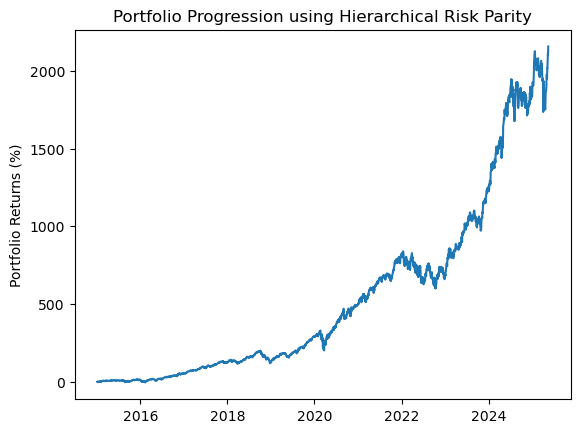

In [16]:
plt.plot(((1+ret_hrp).cumprod()-1)*100)
plt.ylabel("Portfolio Returns (%)")
plt.title("Portfolio Progression using Hierarchical Risk Parity")
plt.savefig("HRP_Returns.png",dpi=300)
plt.show()

3. Inverse Volatility Portfolio

In [18]:
weights=pd.DataFrame(columns=df1.columns)
weights.loc[0]=((1/df1[:dates[0]].std())/(1/df1[:dates[0]].std()).sum()).to_dict()

for k in range(1,len(dates)):
    weights.loc[k]=((1/df1[dates[k-1]:dates[k]].std())/(1/df1[dates[k-1]:dates[k]].std()).sum()).to_dict()

df_ivpr=df_eqvr[:dates[0]]
r3=[]
m3=[]
for m in range(len(dates)-1):
    df_ivpr=pd.concat([df_ivpr,df1[dates[m]:dates[m+1]].dot(weights.loc[m])[1:]])#
    x4,y4,z4=portfolio_performance(df1[dates[m]:dates[m+1]].dot(weights.loc[m])[1:])
    r3.append(x4)
    m3.append(y4)
df_ivpr=pd.concat([df_ivpr,df1[dates[len(dates)-1]:].dot(weights.loc[len(dates)-1])[1:]])

x4,y4,z4=portfolio_performance(df1[dates[len(dates)-1]:].dot(weights.loc[len(dates)-1])[1:])
r3.append(x4)
m3.append(y4)

x4f,y4f,z4f=portfolio_performance(df_ivpr)
z4f

,Sharpe ratio,Annualised returns (CAGR),Maximum drawdown (MDD),Return-to-MDD ratio
Performance Metrics,0.93,18.71,-33.06,0.57


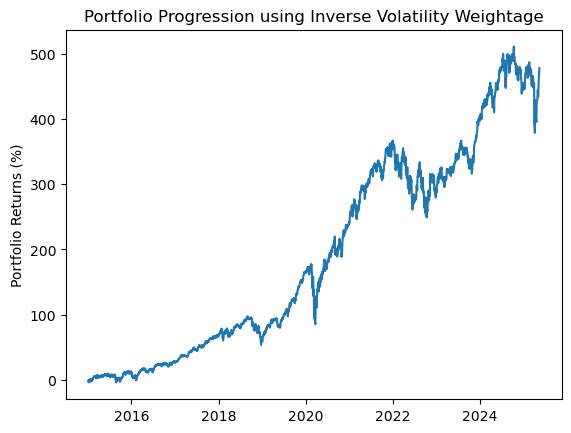

In [19]:
plt.plot(((1+df_ivpr).cumprod()-1)*100)
plt.ylabel("Portfolio Returns (%)")
plt.title("Portfolio Progression using Inverse Volatility Weightage")
plt.savefig("IVPW_Returns.png",dpi=300)
plt.show()

4. Critical Line Algorithm Portfolio

In [21]:
def cla_weights(returns,n):
    d=[]
    x=[]
    for i in range(n):
        w=np.random.random_sample(returns.shape[1])
        weights=w/w.sum()
        a=returns.dot(weights)
        x.append(weights)
        s=(a.mean()/a.std())*np.sqrt(returns.shape[0])
        d.append(s)
        return x[d.index(max(d))]

ret_cla1=df_eqvr[:dates[0]]
weights1=pd.DataFrame(columns=df1.columns)
weights1.loc[0]=cla_weights(df1[:dates[0]],200)
r4=[]
m4=[]
for c in range(len(dates)-1):
    weights1.loc[weights1.shape[0]]=cla_weights(df1[dates[0]:dates[1]],200)
    ret_cla1=pd.concat([ret_cla1,df1[dates[c]:dates[c+1]].dot(weights1.loc[weights1.shape[0]-1])[1:]])
    x5,y5,z5=portfolio_performance(df1[dates[c]:dates[c+1]].dot(weights1.loc[weights1.shape[0]-1])[1:])
    r4.append(x5)
    m4.append(y5)

ret_cla1=pd.concat([ret_cla1,df1[dates[len(dates)-1]:].dot(weights1.loc[len(dates)-1])[1:]])

x5,y5,z5=portfolio_performance(df1[dates[len(dates)-1]:].dot(weights1.loc[len(dates)-1])[1:])
r4.append(x5)
m4.append(y5)

x5f,y5f,z5f=portfolio_performance(ret_cla1)
z5f

,Sharpe ratio,Annualised returns (CAGR),Maximum drawdown (MDD),Return-to-MDD ratio
Performance Metrics,1.01,22.67,-33.72,0.67


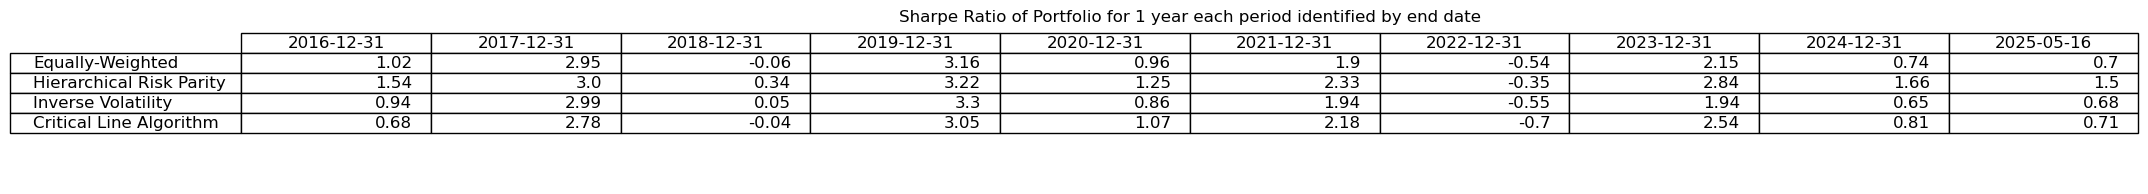

In [22]:
date_index=dates[1:].astype('str').to_list()
date_index.append(df1.index.astype('str').to_list()[-1])
returns_matrix=pd.DataFrame([r1,r2,r3,r4],columns=date_index,index=['Equally-Weighted','Hierarchical Risk Parity','Inverse Volatility','Critical Line Algorithm'])

fig, ax = plt.subplots(figsize=(12, 2)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  
ax.set_title("Sharpe Ratio of Portfolio for {} year each period identified by end date".format(y1x))
tabla = table(ax, returns_matrix, loc='upper center', colWidths=[0.17]*len(returns_matrix.columns))  
tabla.auto_set_font_size(True) 
tabla.set_fontsize(12) 
tabla.scale(1.2, 1.2) 
plt.savefig('Sharpe Ratio.jpg')
plt.show()

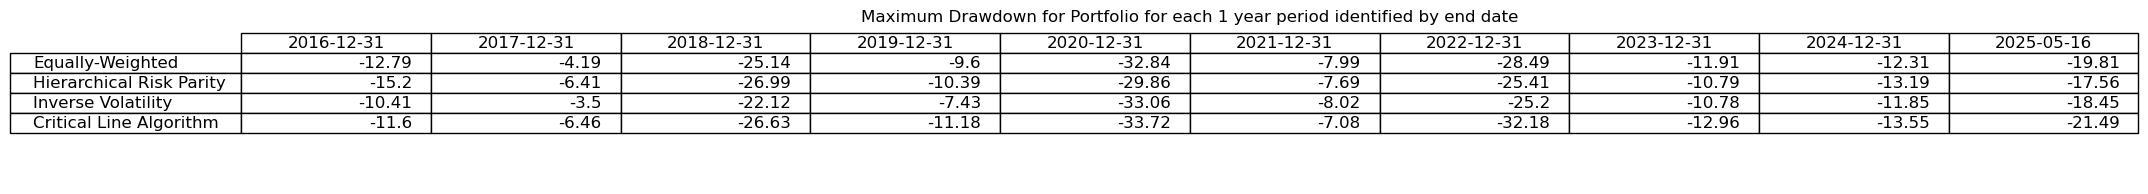

<Figure size 640x480 with 0 Axes>

In [23]:
drawdown_matrix=pd.DataFrame([m1,m2,m3,m4],columns=date_index,index=['Equally-Weighted','Hierarchical Risk Parity','Inverse Volatility','Critical Line Algorithm'])

fig, ax = plt.subplots(figsize=(12, 2)) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  
ax.set_title("Maximum Drawdown for Portfolio for each {} year period identified by end date".format(y1x))
tabla = table(ax, drawdown_matrix, loc='upper center', colWidths=[0.17]*len(drawdown_matrix.columns))  
tabla.auto_set_font_size(True) 
tabla.set_fontsize(12) 
tabla.scale(1.2, 1.2) 
plt.show()
plt.savefig('Drawdown Matrix.png')

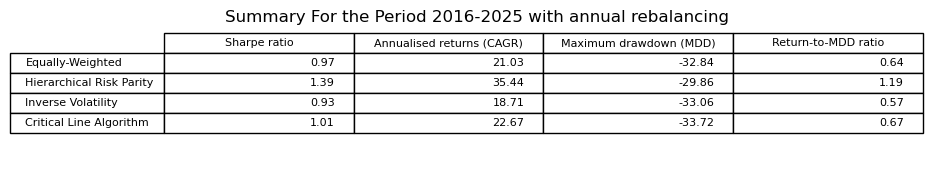

In [24]:
cumulative=pd.concat([z1f,z3f,z4f,z5f],ignore_index=True)
cumulative.index=['Equally-Weighted','Hierarchical Risk Parity','Inverse Volatility','Critical Line Algorithm']

fig, ax = plt.subplots(figsize=(12, 2)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  
ax.set_title("Summary For the Period {}-{} with annual rebalancing".format(dates[1].year,df1.index[-1].year))
tabla = table(ax, cumulative, loc='upper right', colWidths=[0.17]*len(cumulative.columns))  
tabla.auto_set_font_size(True) 
tabla.set_fontsize(12) 
tabla.scale(1.2, 1.2) 
plt.savefig('cumulative.png')
plt.show()

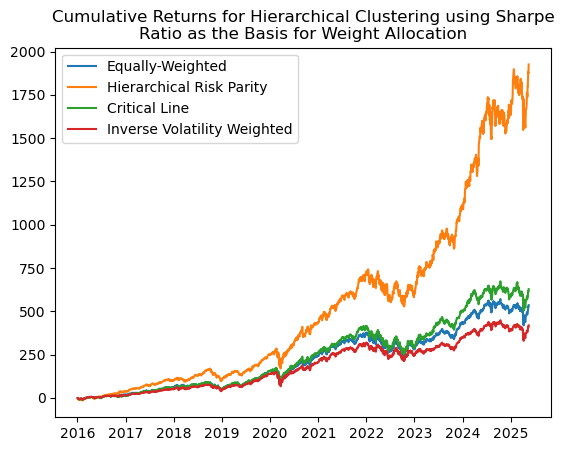

In [50]:
g1=((df_eqvr['2016':]+1).cumprod()-1)*100
g2=((ret_hrp['2016':]+1).cumprod()-1)*100
g3=((ret_cla1['2016':]+1).cumprod()-1)*100
g4=((df_ivpr['2016':]+1).cumprod()-1)*100
plt.plot(g1,label='Equally-Weighted')
plt.plot(g2,label='Hierarchical Risk Parity')
plt.plot(g3,label='Critical Line')
plt.plot(g4,label='Inverse Volatility Weighted')
plt.legend()
title_text = "Cumulative Returns for Hierarchical Clustering using Sharpe Ratio as the Basis for Weight Allocation"
wrapped_title = textwrap.wrap(title_text, 60)
plt.title("\n".join(wrapped_title))
plt.savefig("Consolidated_Returns_Sharpe_Ratio.pdf",dpi=300)
plt.show()

Credits:

1. Dataframe Print Functionality: https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png
2. Tradingview API: https://shner-elmo.github.io/TradingView-Screener/3.0.0/tradingview_screener.html